In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

## K-means algorithm

In [84]:
X, y= make_blobs(n_samples=210, centers=3, n_features=2, cluster_std=0.5, shuffle=True,random_state=0)

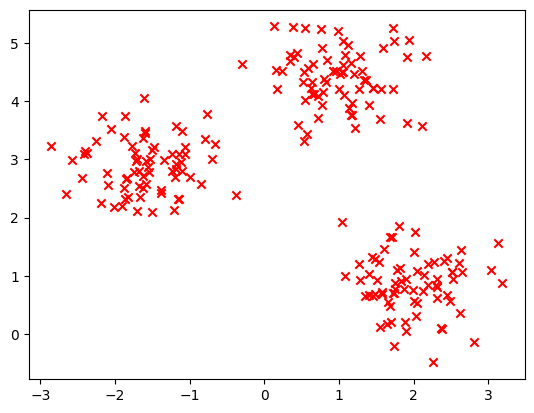

In [85]:
plt.scatter(X[:,0], X[:,1], c='red', marker='x')

In [86]:
kmeans = KMeans(n_clusters = 3, init = "random", n_init = 10 )

In [87]:
kmeans.fit(X, y)

KMeans(init='random', n_clusters=3, n_init=10)

Text(0, 0.5, 'X1')

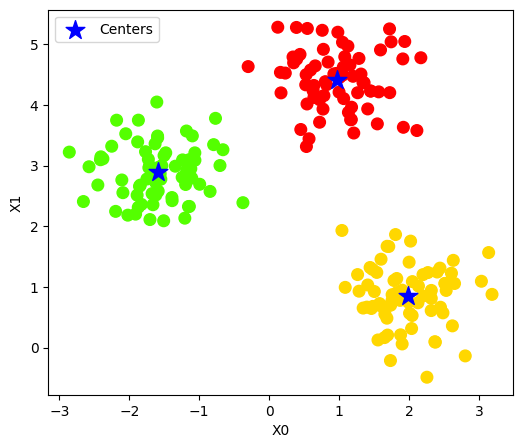

In [88]:
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=70, c=kmeans.labels_, cmap=plt.cm.prism) 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=200,
            color='blue', label='Centers')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')

In [89]:
print(f"Inertia: {kmeans.inertia_}")

Inertia: 98.78710787930845


### k-means
### Numer of clusters is higher than expected

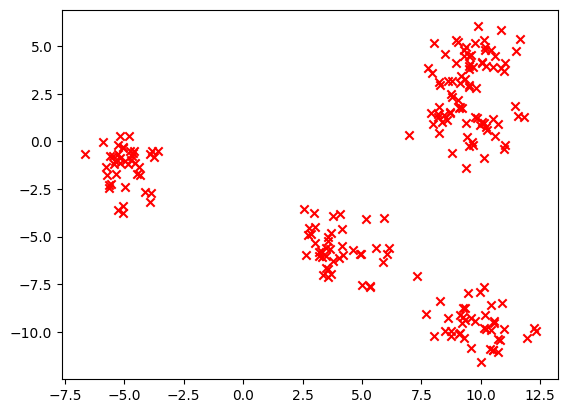

In [90]:
X, y = make_blobs(n_samples=210, centers=5, n_features=2, cluster_std=1, shuffle=True, random_state=4)

plt.scatter(X[:, 0], X[:, 1], c='red', marker='x')

Text(0, 0.5, 'X1')

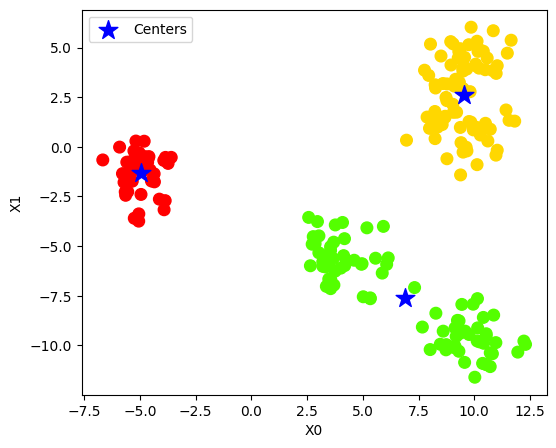

In [91]:
kmeans = KMeans(n_clusters=3, init="random", n_init=10, )
kmeans.fit(X, y)
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], s=70, c=kmeans.labels_, cmap=plt.cm.prism)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=200,
            color='blue', label='Centers')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')

### Numer of clusters is lower than expected

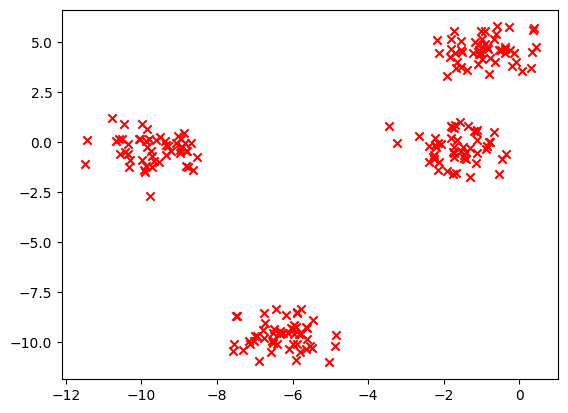

In [92]:
X, y = make_blobs(n_samples=210, centers=4, n_features=2, cluster_std=0.7, shuffle=True, random_state=11)

plt.scatter(X[:, 0], X[:, 1], c='red', marker='x')

Text(0, 0.5, 'X1')

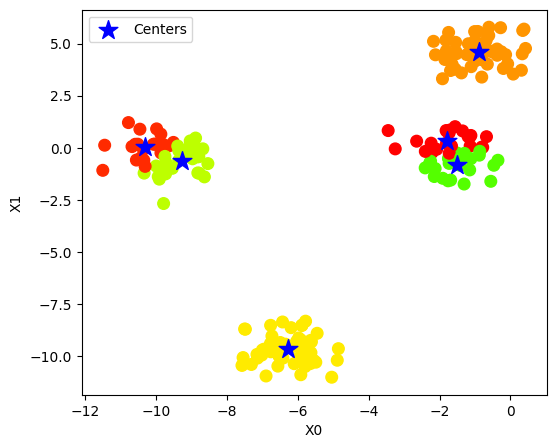

In [93]:
kmeans = KMeans(n_clusters=6, init="random", n_init=10, )
kmeans.fit(X, y)
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], s=70, c=kmeans.labels_, cmap=plt.cm.prism)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=200,
            color='blue', label='Centers')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')

## k-means++

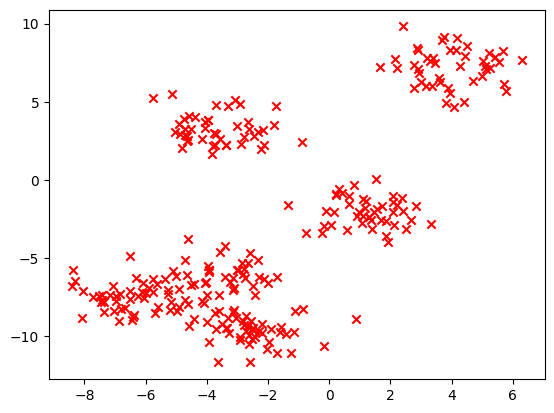

In [94]:
X, y = make_blobs(n_samples=270, centers=6, n_features=2, cluster_std=1, shuffle=True, random_state=60)

plt.scatter(X[:, 0], X[:, 1], c='red', marker='x')

Text(0, 0.5, 'X1')

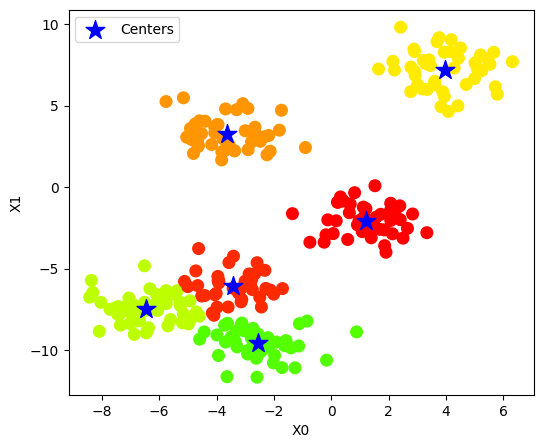

In [95]:
kmeans = KMeans(n_clusters=6, init="k-means++", n_init=10, )
kmeans.fit(X, y)
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], s=70, c=kmeans.labels_, cmap=plt.cm.prism)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=200,
            color='blue', label='Centers')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')

## Elbow method

Text(0.5, 1.0, 'Number of clusters: 7')

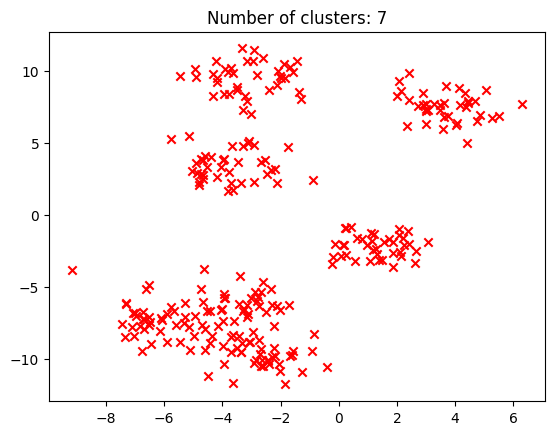

In [96]:
X, y = make_blobs(n_samples=270, centers=7, n_features=2, cluster_std=1, shuffle=True, random_state=60)

plt.scatter(X[:, 0], X[:, 1], c='red', marker='x')
plt.title(f"Number of clusters: {7}")

In [97]:
def elbow_method_helper(k, x, y):
    kmeans = KMeans(n_clusters=k, init="random", n_init=10 )
    kmeans.fit(X, y)
    plt.figure(figsize=(6, 5))
    plt.scatter(X[:, 0], X[:, 1], s=70, c=kmeans.labels_, cmap=plt.cm.prism)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=200,
                color='blue', label='Centers')
    plt.legend(loc='best')
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.title(f"Number of clusters: {k}")
    plt.show()
    
    return kmeans.inertia_

In [98]:
def elbow_method(n_clusters, x, y):
    clusters = list(range(1, n_clusters + 1, 1))
    
    list_of_inertia = []
    
    for cluster in clusters:
        inertia = elbow_method_helper(cluster, x, y)
        list_of_inertia.append(inertia)
        
    plt.figure()
    plt.plot(clusters, list_of_inertia)
    plt.title(f"Inertia")
    plt.xlabel("number of clusters")
    plt.ylabel("Inertia")

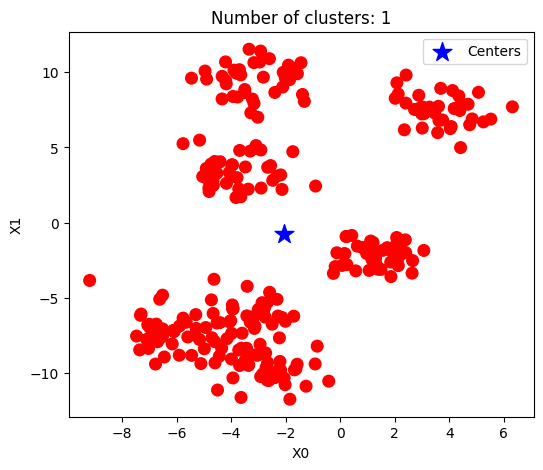

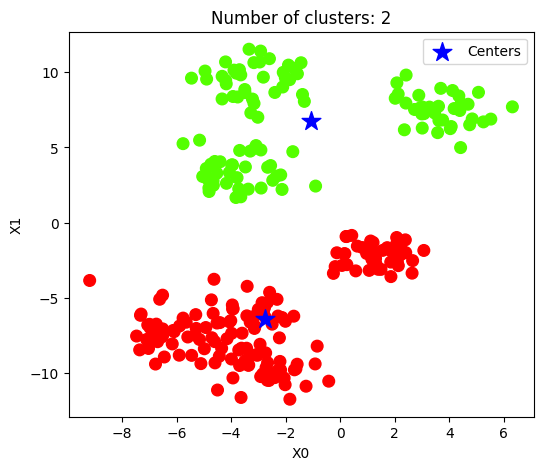

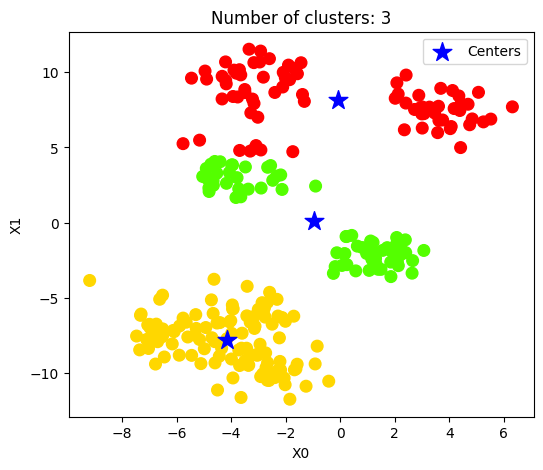

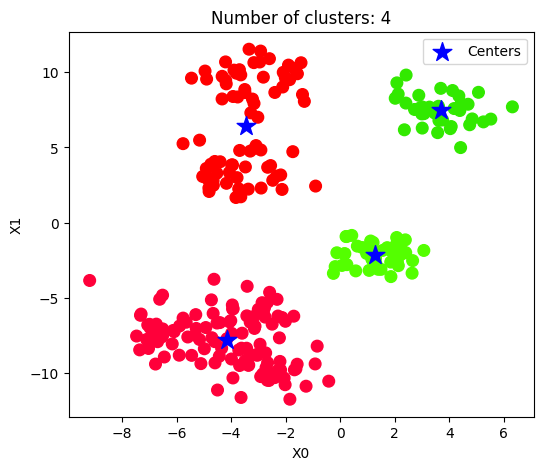

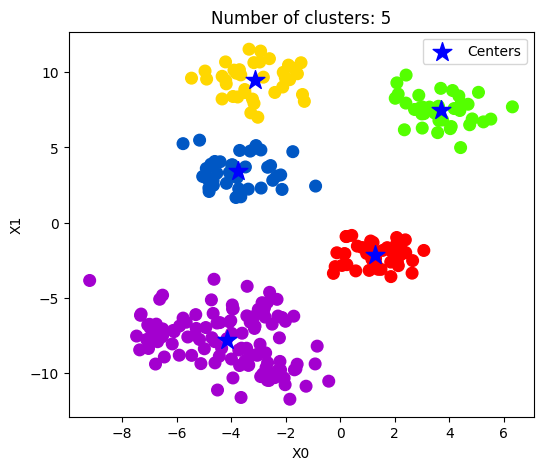

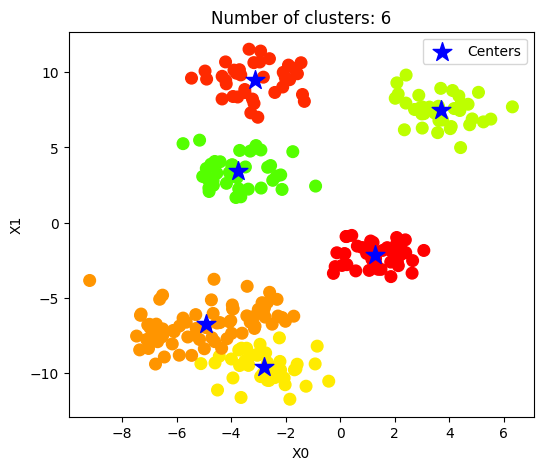

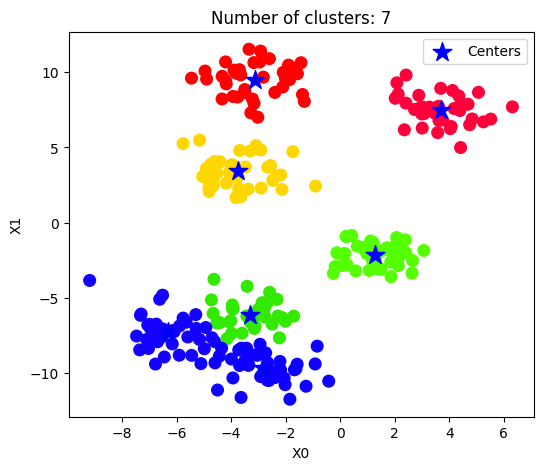

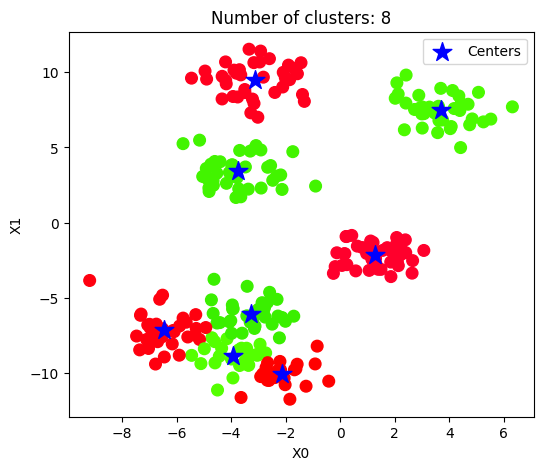

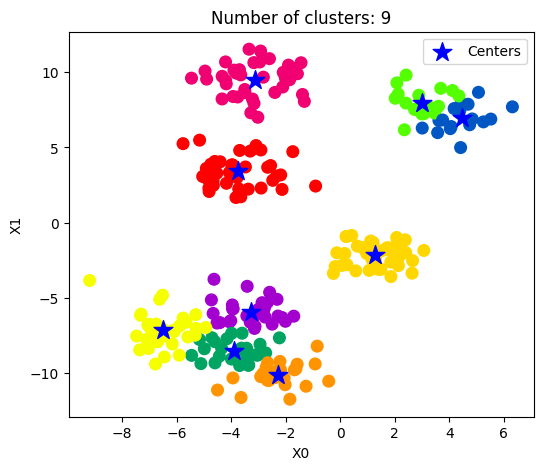

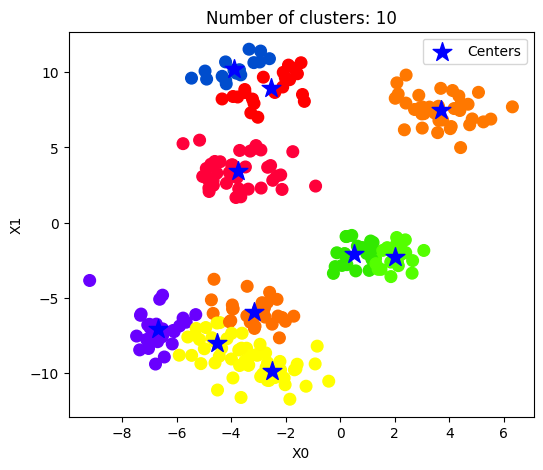

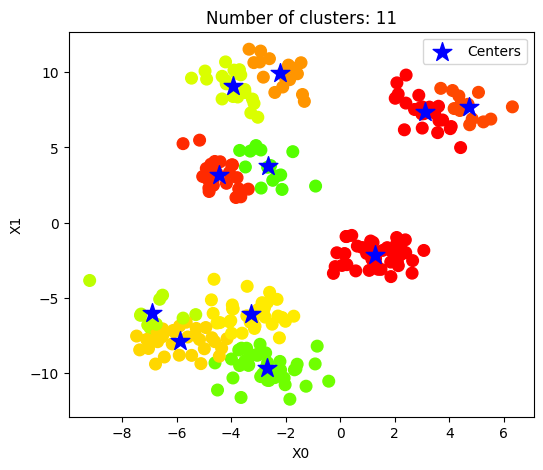

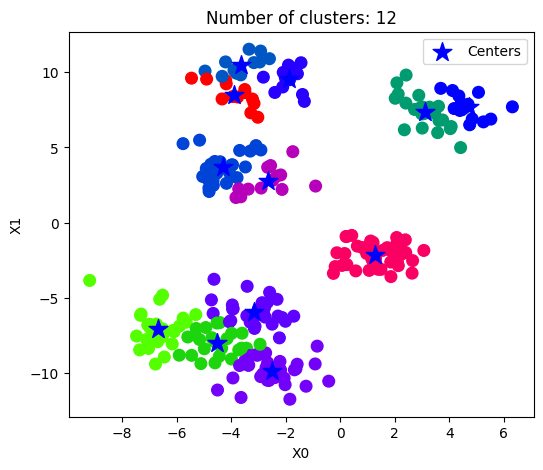

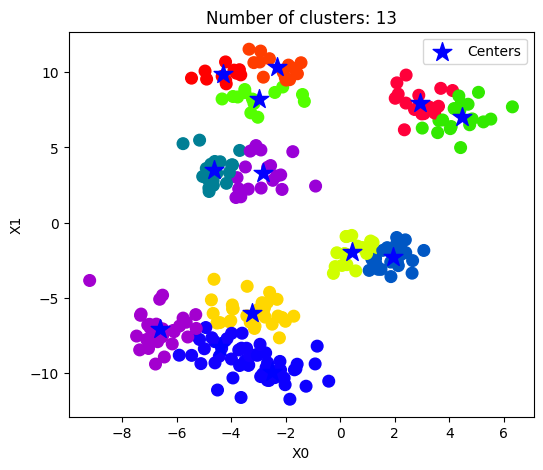

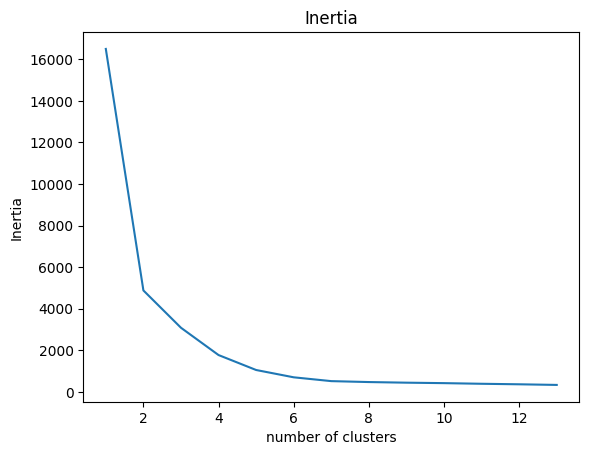

In [99]:
elbow_method(13, X, y)

In [100]:
from sklearn.datasets import make_moons
import seaborn as sns
 
x, y = make_moons(1000, noise=.05, random_state=0)
X_moon = pd.DataFrame(x, columns = ['f1','f2'])

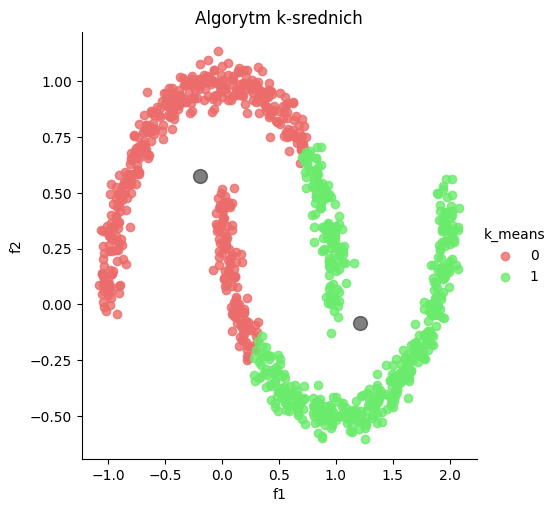

In [101]:
#metoda klasteryzacji
# km -model KMeans
#y_km - wynik predykcji
km = KMeans(n_clusters=2, init="random")
y_km = km.fit_predict(x, y)
 
#wykres
X_moon['k_means'] = y_km
sns.lmplot(data=X_moon, x='f1', y='f2', fit_reg=False, hue = 'k_means', palette = ['#eb6c6a', '#6aeb6c']).set(title='Algorytm k-srednich')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='black', s=100, alpha=0.5)
plt.show()